In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import rpy2
%load_ext rpy2.ipython

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [18]:
for g, df_g in df_train.groupby('AnimalType'):
    print g, len(df_g)d

Cat 11134
Dog 15595


In [19]:
for g, df_g in df_train.groupby('SexuponOutcome'):
    print g, len(df_g)

Intact Female 3511
Intact Male 3525
Neutered Male 9779
Spayed Female 8820
Unknown 1093


In [20]:
for g, df_g in df_train.groupby('OutcomeSubtype'):
    print g, len(df_g)

Aggressive 320
At Vet 4
Barn 2
Behavior 86
Court/Investigation 6
Enroute 8
Foster 1800
In Foster 52
In Kennel 114
In Surgery 3
Medical 66
Offsite 165
Partner 7816
Rabies Risk 74
SCRP 1599
Suffering 1002


In [23]:
for g, df_g in df_train.groupby('AgeuponOutcome'):
    print g, len(df_g)

0 years 22
1 day 66
1 month 1281
1 week 146
1 weeks 171
1 year 3969
10 months 457
10 years 446
11 months 166
11 years 126
12 years 234
13 years 143
14 years 97
15 years 85
16 years 36
17 years 17
18 years 10
19 years 3
2 days 99
2 months 3397
2 weeks 529
2 years 3742
20 years 2
3 days 109
3 months 1277
3 weeks 659
3 years 1823
4 days 50
4 months 888
4 weeks 334
4 years 1071
5 days 24
5 months 652
5 weeks 11
5 years 992
6 days 50
6 months 588
6 years 670
7 months 288
7 years 531
8 months 402
8 years 536
9 months 224
9 years 288


In [46]:
df_prop = df_train.groupby(['AnimalType', 'OutcomeType'], as_index=False).count()
df_prop_sub = df_train.groupby(['AnimalType', 'OutcomeType', 'OutcomeSubtype'], as_index=False).count()

In [48]:
df_prop_sub

,AnimalType,OutcomeType,OutcomeSubtype,AnimalID,Name,DateTime,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Cat,Adoption,Barn,1,0,1,1,1,1,1
1,Cat,Adoption,Foster,1095,942,1095,1095,1095,1095,1095
2,Cat,Adoption,Offsite,64,57,64,64,64,64,64
3,Cat,Died,At Vet,2,1,2,2,2,2,2
4,Cat,Died,Enroute,6,0,6,6,6,6,6
5,Cat,Died,In Foster,45,24,45,45,45,45,45
6,Cat,Died,In Kennel,84,27,84,84,84,84,84
7,Cat,Euthanasia,Aggressive,3,1,3,3,3,3,3
8,Cat,Euthanasia,Medical,26,10,26,26,26,26,26
9,Cat,Euthanasia,Rabies Risk,28,5,28,28,28,28,28


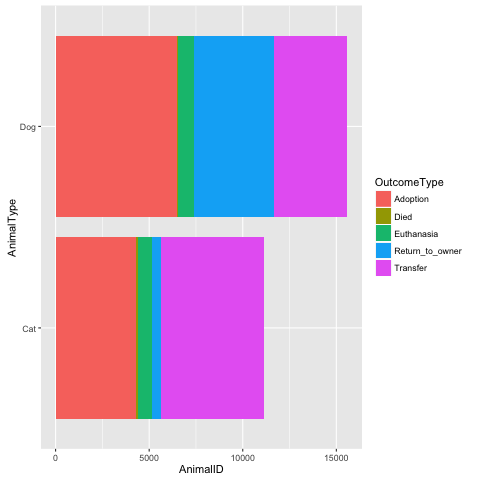

In [54]:
%%R -i df_prop
library(ggplot2)
ggplot(df_prop, aes(x = AnimalType, y = AnimalID, fill = OutcomeType)) + 
    geom_bar(stat='identity') + coord_flip()

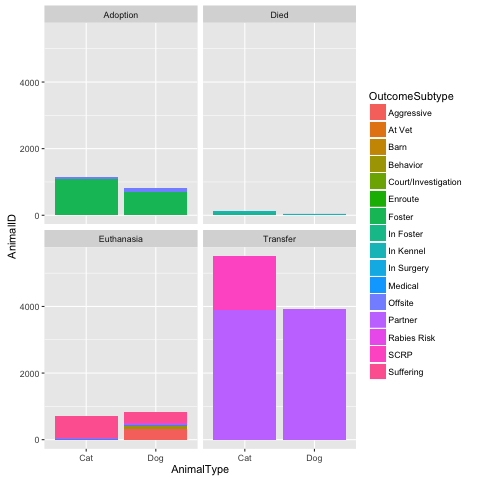

In [52]:
%%R -i df_prop_sub
library(ggplot2)
ggplot(df_prop_sub, aes(x = AnimalType, y = AnimalID, fill = OutcomeSubtype)) + 
    geom_bar(stat='identity') + facet_wrap(~OutcomeType)